(c) 2021, Franz Ludwig Kostelezky, IMTEK chair of simulation, \<info@kostelezky.com\>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
# import physiobank ecg data
data_physionet = pd.read_csv('./ECG_data/physionet/ecg_id_01_1.csv', sep=",", header=2)
data_physionet.columns = ['time', 'ECG I', 'ECG I filtered']

In [60]:
t_max = 20 # s
len_series = len(data_physionet['ECG I'])
sample_frequency = len_series / t_max
t = np.linspace(0, t_max, len_series)

<IPython.core.display.Javascript object>


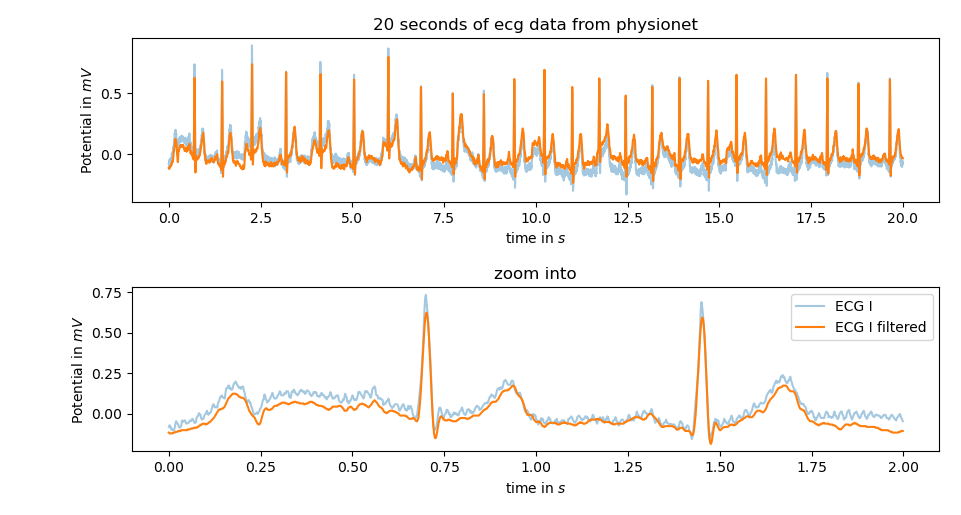

In [35]:
%matplotlib notebook
plt.subplot(2, 1, 1)
plt.title('20 seconds of ecg data from physionet')
plt.plot(t, data_physionet['ECG I'], alpha=.4, label='ECG I')
plt.plot(t, data_physionet['ECG I filtered'], label='ECG I filtered')
plt.xlabel('time in $s$')
plt.ylabel('Potential in $mV$')
plt.subplot(2, 1, 2)
plt.title('zoom into')
plt.plot(t[:1000], data_physionet['ECG I'][:1000], alpha=.4, label='ECG I')
plt.plot(t[:1000], data_physionet['ECG I filtered'][:1000], label='ECG I filtered')
plt.xlabel('time in $s$')
plt.ylabel('Potential in $mV$')
plt.legend()
plt.tight_layout()
plt.show()

The starting value and the ending value of the above series by PhysioBank differ neglectable.

In [38]:
print(data_physionet['ECG I filtered'][0] - data_physionet['ECG I filtered'][len(data_physionet['ECG I filtered'])-1])

-0.08


# Fourier analysis
Examining to obtain the base frequency $\omega_0$ of the signal. Since the signal is periodic and shows a noticable peak ata the R-waves, the base frequency must show a high amplitude in the fourier transform. From the base frequency one can receive the period $T$ of the signal via $\omega_0=\frac{2\pi}{T}$.

In [108]:
sp = np.fft.rfft(data_physionet['ECG I filtered'])
freq = np.fft.rfftfreq(t.shape[-1])

<IPython.core.display.Javascript object>


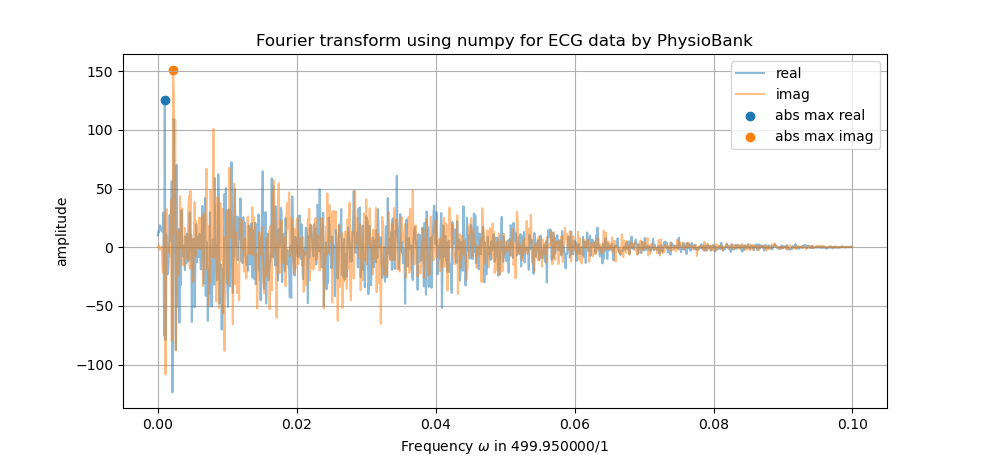

In [114]:
%matplotlib notebook

max_value = 1000

plt.plot(freq[:max_value], sp.real[:max_value], alpha=.5, label='real')
plt.plot(freq[:max_value], sp.imag[:max_value], alpha=.5, label='imag')

m_real = max(abs(sp.real))
f_real = freq[np.where(sp.real == m_real)]
plt.scatter(f_real, m_real, label='abs max real')
m_imag = max(abs(sp.imag))
f_imag = freq[np.where(sp.imag == m_imag)]
plt.scatter(f_imag, m_imag, label='abs max imag')

plt.title('Fourier transform using numpy for ECG data by PhysioBank')
plt.ylabel('amplitude')
plt.xlabel('Frequency $\omega$ in %f/1' % (sample_frequency))
plt.legend()
plt.grid()
plt.show()

In [115]:
f_real[0] * sample_frequency

0.5

In [116]:
f_imag[0] * sample_frequency

1.0999999999999999

The base frequencies (imaginary and real) could be determined:

$$
\omega_{0,real} = 0.5 Hz
\\
\omega_{0,imag} \approx 1.1 Hz
$$

Which makes totally sense considering that a heart usually beats at around $1 bps$. In the used ECG series the heart shows a beat at around $72 bpm$ which equals $1.2 bps$.